In [ ]:
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/ArrivalData.xlsx'
# Read the Excel file
arrival_data = pd.read_excel(file_path)

# Display the first few rows
arrival_data.head()

,Week,Day of the Week,isWeekday,Hour,NofArrival
0,1,Monday,1,00:00-01:00,0
1,1,Monday,1,01:00-02:00,0
2,1,Monday,1,02:00-03:00,0
3,1,Monday,1,03:00-04:00,0
4,1,Monday,1,04:00-05:00,0


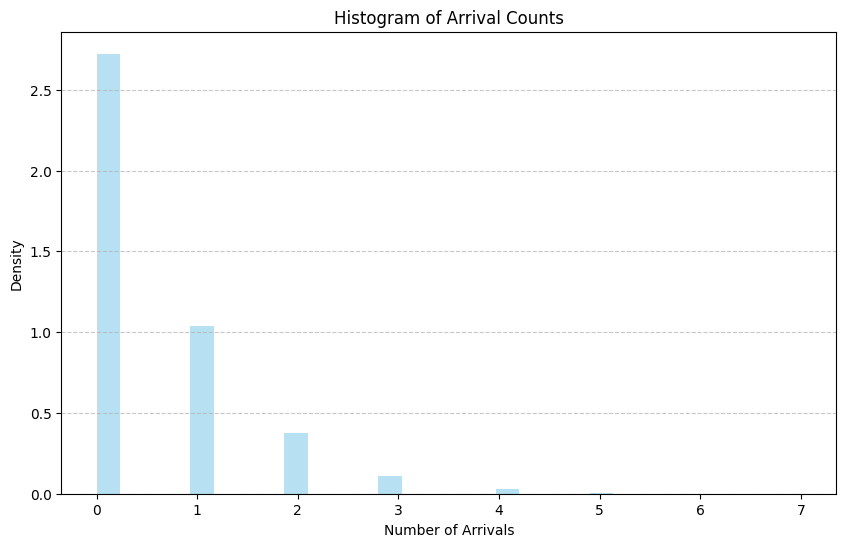

In [ ]:
import matplotlib.pyplot as plt

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(arrival_data['NofArrival'], bins=30, density=True, alpha=0.6, color='skyblue')
plt.title("Histogram of Arrival Counts")
plt.xlabel('Number of Arrivals')
plt.ylabel('Density')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

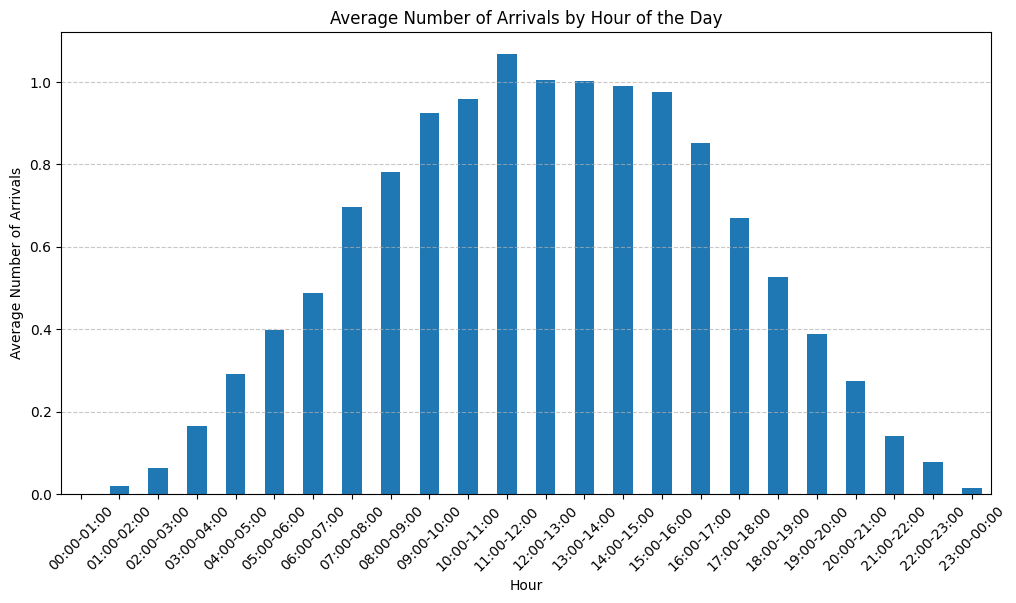

In [ ]:
# Aggregate data by Hour to see the overall pattern of arrivals by hour of the day
hourly_data = arrival_data.groupby('Hour')['NofArrival'].mean()

# Plotting the hourly arrival data
plt.figure(figsize=(12, 6))
hourly_data.plot(kind='bar')
plt.title('Average Number of Arrivals by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Average Number of Arrivals')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


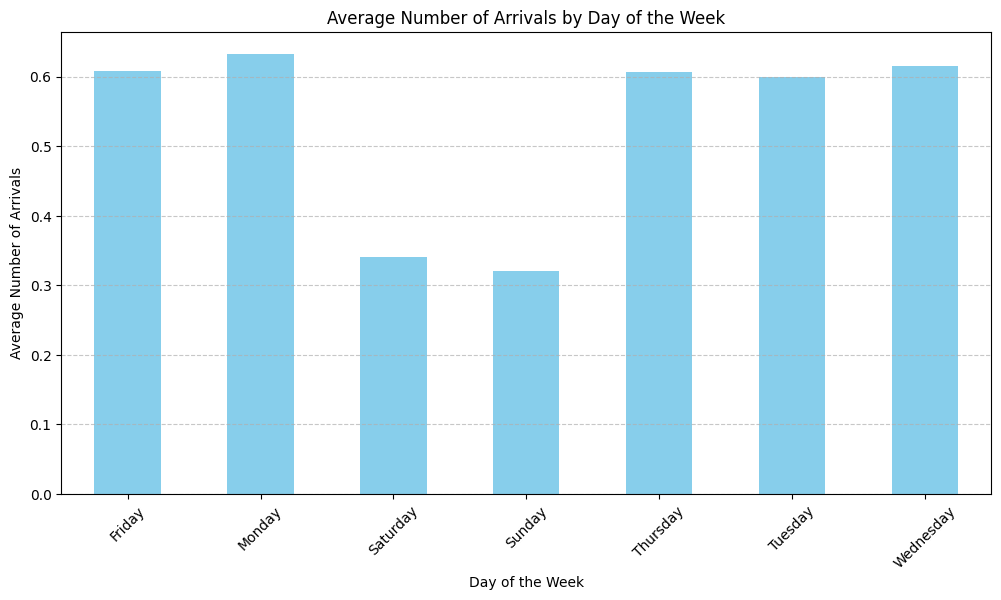

In [ ]:
# Aggregate data by Day of the Week to see the overall pattern of arrivals
daily_data = arrival_data.groupby('Day of the Week')['NofArrival'].mean()

# Plotting the daily arrival data
plt.figure(figsize=(12, 6))
daily_data.plot(kind='bar', color='skyblue')
plt.title('Average Number of Arrivals by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Number of Arrivals')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
from scipy.stats import skew, kurtosis

# Calculate descriptive statistics
print("Descriptive Statistics:")
print(arrival_data['NofArrival'].describe())
print(f"Skewness: {skew(arrival_data['NofArrival'])}")
print(f"Kurtosis: {kurtosis(arrival_data['NofArrival'])}")

Descriptive Statistics:
count    16800.000000
mean         0.531667
std          0.836157
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          7.000000
Name: NofArrival, dtype: float64
Skewness: 1.8204455348229258
Kurtosis: 3.8106514806520746


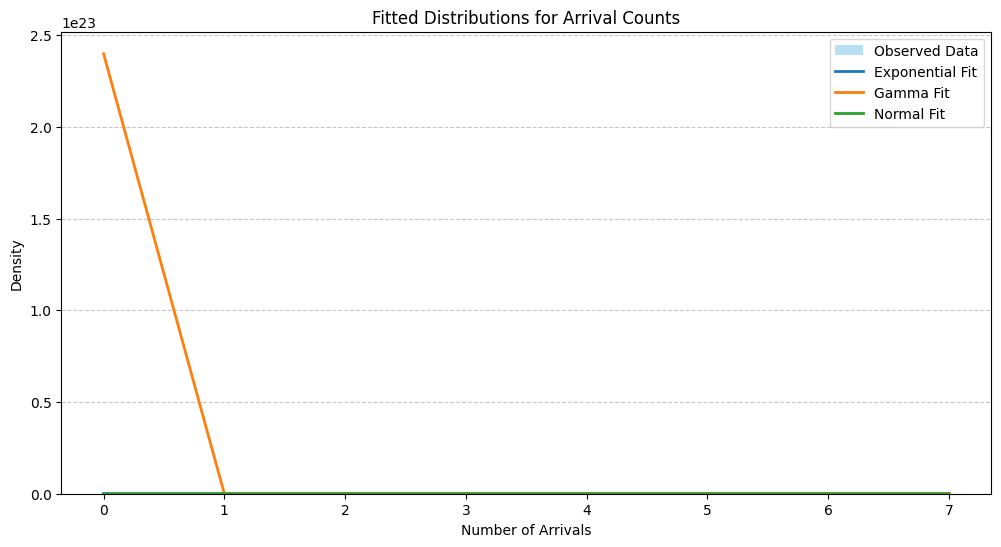

Fitted Distribution Parameters:
Exponential: (0.0, 0.5316666666666666)
Gamma: (0.046395462534394014, -1.2413064350076641e-26, 1.0700140177767143)
Normal: (0.5316666666666666, 0.8361317299572298)


In [ ]:
from scipy.stats import expon, gamma, norm

# Extract data
data = arrival_data['NofArrival']

# Fit distributions
params_exp = expon.fit(data)
params_gamma = gamma.fit(data)
params_norm = norm.fit(data)

# Generate PDFs
x = np.sort(data)
pdf_exp = expon.pdf(x, *params_exp)
pdf_gamma = gamma.pdf(x, *params_gamma)
pdf_norm = norm.pdf(x, *params_norm)

# Plot distributions
plt.figure(figsize=(12, 6))
plt.hist(data, bins=30, density=True, alpha=0.6, color='skyblue', label='Observed Data')
plt.plot(x, pdf_exp, label='Exponential Fit', lw=2)
plt.plot(x, pdf_gamma, label='Gamma Fit', lw=2)
plt.plot(x, pdf_norm, label='Normal Fit', lw=2)
plt.title("Fitted Distributions for Arrival Counts")
plt.xlabel('Number of Arrivals')
plt.ylabel('Density')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Print fitted parameters
print("Fitted Distribution Parameters:")
print(f"Exponential: {params_exp}")
print(f"Gamma: {params_gamma}")
print(f"Normal: {params_norm}")

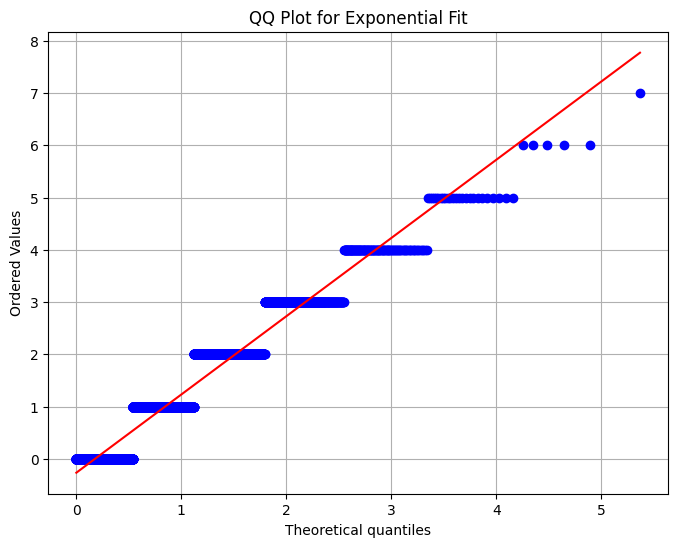

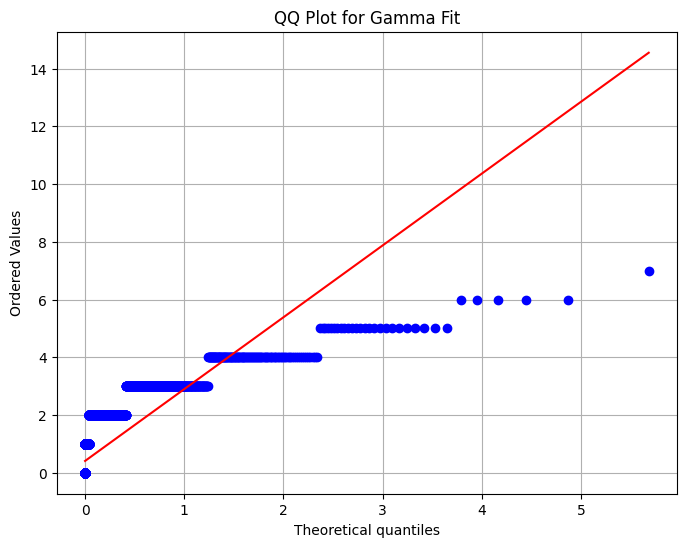

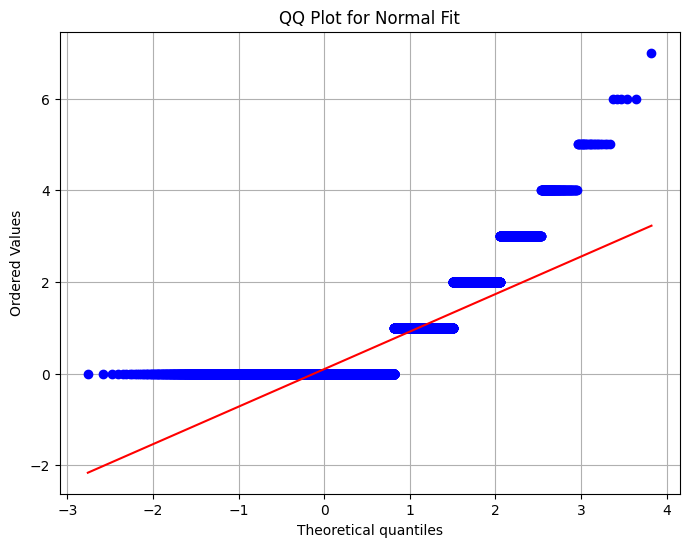

In [ ]:
# Ensuring that 'data' is properly defined as a numpy array for refitting
from scipy.stats import probplot
data = np.array(arrival_data['NofArrival'])

# Refit distributions to redefine parameters for Exponential, Gamma, and Normal distributions
params_exp = expon.fit(data)
params_gamma = gamma.fit(data)
params_norm = norm.fit(data)

# Generate QQ plots for Exponential, Gamma, and Normal distributions

# Exponential QQ plot
plt.figure(figsize=(8, 6))
probplot(data, dist="expon", sparams=params_exp, plot=plt)
plt.title("QQ Plot for Exponential Fit")
plt.grid()
plt.show()

# Gamma QQ plot
plt.figure(figsize=(8, 6))
probplot(data, dist="gamma", sparams=params_gamma, plot=plt)
plt.title("QQ Plot for Gamma Fit")
plt.grid()
plt.show()

# Normal QQ plot
plt.figure(figsize=(8, 6))
probplot(data, dist="norm", sparams=params_norm, plot=plt)
plt.title("QQ Plot for Normal Fit")
plt.grid()
plt.show()

In [ ]:
from scipy.stats import kstest

# Test Exponential
ks_exp = kstest(data, 'expon', args=params_exp)
print(f"Exponential KS Test: {ks_exp}")

# Test Gamma
ks_gamma = kstest(data, 'gamma', args=params_gamma)
print(f"Gamma KS Test: {ks_gamma}")

# Test Normal
ks_norm = kstest(data, 'norm', args=params_norm)
print(f"Normal KS Test: {ks_norm}")

Exponential KS Test: KstestResult(statistic=1.0, pvalue=0.0, statistic_location=0, statistic_sign=1)
Gamma KS Test: KstestResult(statistic=0.9357921001421695, pvalue=0.12841579971566097, statistic_location=0, statistic_sign=1)
Normal KS Test: KstestResult(statistic=0.7375676996421656, pvalue=0.5248646007156688, statistic_location=0, statistic_sign=1)


Estimated Negative Binomial Parameters: r=1.687667239658403, p=0.760438631991597


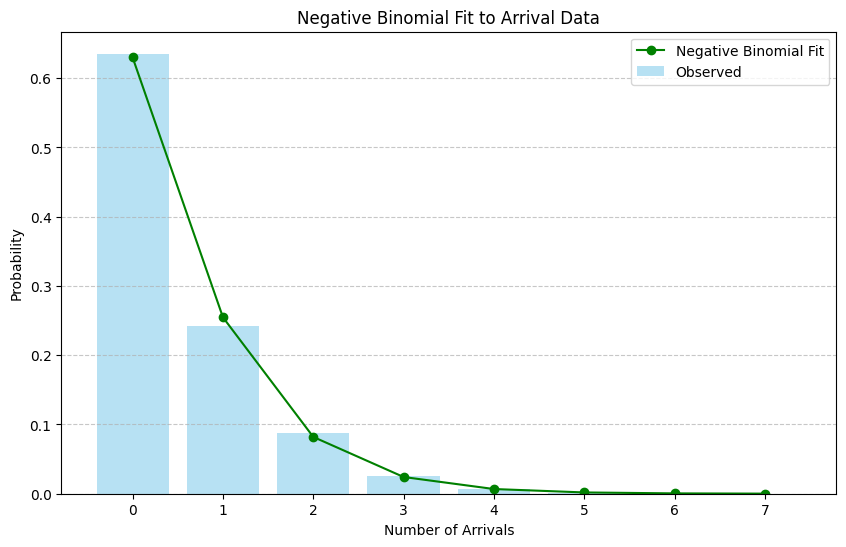

In [ ]:
fro scipy.mstats import nbinom

# Estimate parameters for Negative Binomial
mean_arrival = arrival_data['NofArrival'].mean()
var_arrival = arrival_data['NofArrival'].var()
r = (mean_arrival**2) / (var_arrival - mean_arrival)
p = r / (r + mean_arrival)

print(f"Estimated Negative Binomial Parameters: r={r}, p={p}")

# Compare the observed and theoretical Negative Binomial distributions
nbinom_prob = [nbinom.pmf(k, r, p) for k in x]

# Plot the comparison
plt.figure(figsize=(10, 6))
plt.bar(x, observed_freq / observed_freq.sum(), alpha=0.6, label='Observed', color='skyblue')
plt.plot(x, nbinom_prob, 'o-', label='Negative Binomial Fit', color='green')
plt.title("Negative Binomial Fit to Arrival Data")
plt.xlabel("Number of Arrivals")
plt.ylabel("Probability")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
from scipy.stats import chisquare

# Calculate expected frequencies for Poisson
expected_poisson = [poisson.pmf(k, lambda_poisson) * observed_freq.sum() for k in x]
expected_poisson = np.array(expected_poisson) * (observed_freq.sum() / sum(expected_poisson))  # Normalize

# Chi-square test for Poisson
chi2_poisson = chisquare(f_obs=observed_freq, f_exp=expected_poisson)
print(f"Poisson Chi-Square Test: {chi2_poisson}")

# Calculate expected frequencies for Negative Binomial
expected_nbinom = [nbinom.pmf(k, r, p) * observed_freq.sum() for k in x]
expected_nbinom = np.array(expected_nbinom) * (observed_freq.sum() / sum(expected_nbinom))  # Normalize

# Chi-square test for Negative Binomial
chi2_nbinom = chisquare(f_obs=observed_freq, f_exp=expected_nbinom)
print(f"Negative Binomial Chi-Square Test: {chi2_nbinom}")

Poisson Chi-Square Test: Power_divergenceResult(statistic=893.6571944281368, pvalue=1.1246393785807791e-188)
Negative Binomial Chi-Square Test: Power_divergenceResult(statistic=23.948873932697182, pvalue=0.0011631665085445535)


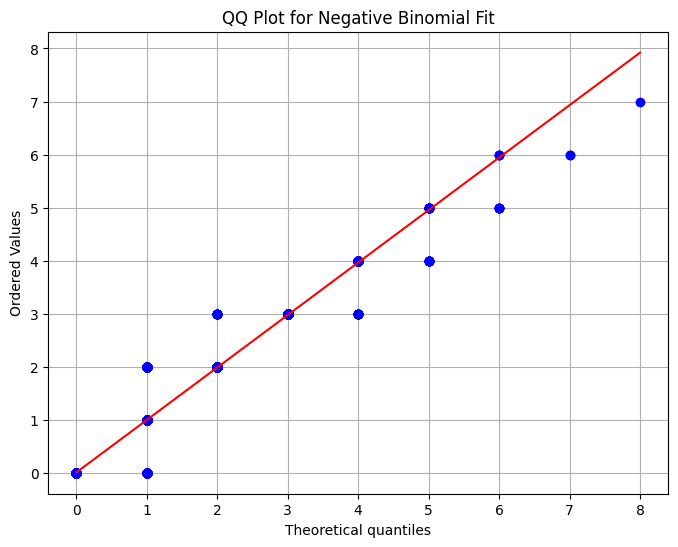

In [ ]:
# Generate a QQ plot for the Negative Binomial fit
plt.figure(figsize=(8, 6))

# Simulate theoretical quantiles based on the Negative Binomial distribution
probplot(arrival_data['NofArrival'], dist="nbinom", sparams=(r, p), plot=plt)

plt.title("QQ Plot for Negative Binomial Fit")
plt.grid()
plt.show()

Estimated Poisson Rate (λ): 0.5316666666666666


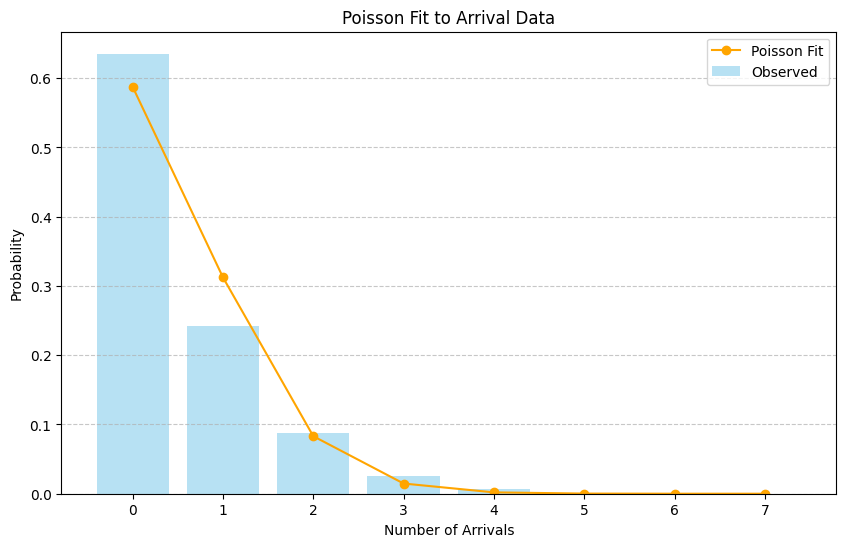

In [ ]:
from scipy.stats import poisson

# Estimate the Poisson rate (mean of the data)
lambda_poisson = arrival_data['NofArrival'].mean()
print(f"Estimated Poisson Rate (λ): {lambda_poisson}")

# Compare the observed and theoretical Poisson distributions
x = range(0, arrival_data['NofArrival'].max() + 1)
observed_freq = arrival_data['NofArrival'].value_counts().sort_index()
poisson_prob = [poisson.pmf(k, lambda_poisson) for k in x]

# Plot the comparison
plt.figure(figsize=(10, 6))
plt.bar(x, observed_freq / observed_freq.sum(), alpha=0.6, label='Observed', color='skyblue')
plt.plot(x, poisson_prob, 'o-', label='Poisson Fit', color='orange')
plt.title("Poisson Fit to Arrival Data")
plt.xlabel("Number of Arrivals")
plt.ylabel("Probability")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

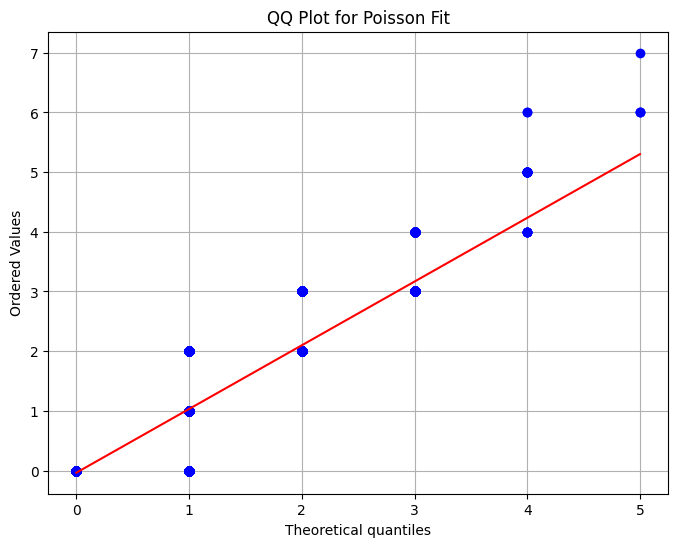

In [ ]:
# Generate QQ plot for Poisson distribution using the estimated λ
plt.figure(figsize=(8, 6))
probplot(arrival_data['NofArrival'], dist="poisson", sparams=(lambda_poisson,), plot=plt)
plt.title("QQ Plot for Poisson Fit")
plt.grid()
plt.show()